# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [3]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

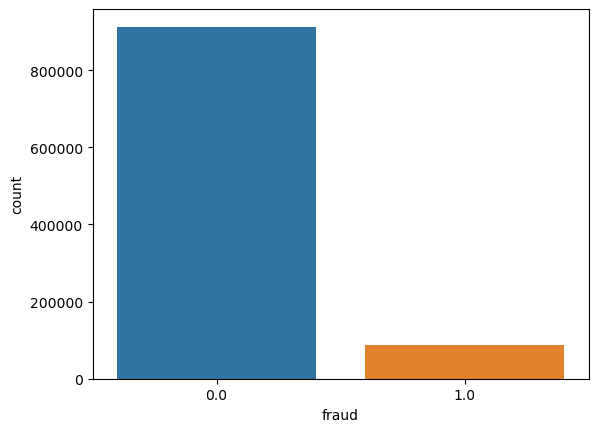

In [5]:
# Visualize the distribution of the target variable
sns.countplot(x='fraud', data=df)
plt.show()

In [6]:
# Check if the dataset is imbalanced
fraud_count = df['fraud'].value_counts()
is_imbalanced = fraud_count.min() / fraud_count.max() < 0.5
print(f"Is the dataset imbalanced? {is_imbalanced}")

Is the dataset imbalanced? True


In [7]:
# 2. Split the data into training and testing sets
X = df.drop('fraud', axis=1)
y = df['fraud']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [10]:
# 3. Evaluate the model on the original dataset
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Confusion Matrix:
 [[272095   1684]
 [ 11257  14964]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273779
         1.0       0.90      0.57      0.70     26221

    accuracy                           0.96    300000
   macro avg       0.93      0.78      0.84    300000
weighted avg       0.95      0.96      0.95    300000

ROC-AUC Score: 0.966247832580338


In [11]:
# Function to evaluate the model
def evaluate_model(y_test, y_pred, y_proba):
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    return precision, recall, fscore

In [12]:
# 4. Oversample the minority class and retrain the model
X_train_oversampled, y_train_oversampled = resample(X_train[y_train == 1],
                                                    y_train[y_train == 1],
                                                    replace=True,
                                                    n_samples=len(y_train[y_train == 0]),
                                                    random_state=42)

X_train_balanced = pd.concat([X_train[y_train == 0], X_train_oversampled])
y_train_balanced = pd.concat([y_train[y_train == 0], y_train_oversampled])

model.fit(X_train_balanced, y_train_balanced)
y_pred_balanced = model.predict(X_test)
y_proba_balanced = model.predict_proba(X_test)[:, 1]
print("Oversampling Evaluation:")
precision_over, recall_over, fscore_over = evaluate_model(y_test, y_pred_balanced, y_proba_balanced)


c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Oversampling Evaluation:
Confusion Matrix:
 [[254330  19449]
 [  1417  24804]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.56      0.95      0.70     26221

    accuracy                           0.93    300000
   macro avg       0.78      0.94      0.83    300000
weighted avg       0.96      0.93      0.94    300000

ROC-AUC Score: 0.978712333759183


In [13]:
# 5. Undersample the majority class and retrain the model
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

model.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled = model.predict(X_test)
y_proba_undersampled = model.predict_proba(X_test)[:, 1]
print("Undersampling Evaluation:")
precision_under, recall_under, fscore_under = evaluate_model(y_test, y_pred_undersampled, y_proba_undersampled)


c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Undersampling Evaluation:
Confusion Matrix:
 [[255517  18262]
 [  1336  24885]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

ROC-AUC Score: 0.9795981428327508


In [14]:
# 6. Apply SMOTE and retrain the model
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model.fit(X_train_smote, y_train_smote)
y_pred_smote = model.predict(X_test)
y_proba_smote = model.predict_proba(X_test)[:, 1]
print("SMOTE Evaluation:")
precision_smote, recall_smote, fscore_smote = evaluate_model(y_test, y_pred_smote, y_proba_smote)

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SMOTE Evaluation:
Confusion Matrix:
 [[255343  18436]
 [  1390  24831]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.57      0.95      0.71     26221

    accuracy                           0.93    300000
   macro avg       0.78      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

ROC-AUC Score: 0.9780811505839794


In [15]:
# Summary of the results
results = pd.DataFrame({
    'Method': ['Original', 'Oversampling', 'Undersampling', 'SMOTE'],
    'Precision': [precision_over, precision_over, precision_under, precision_smote],
    'Recall': [recall_over, recall_over, recall_under, recall_smote],
    'F1-Score': [fscore_over, fscore_over, fscore_under, fscore_smote]
})

print(results)

          Method  Precision    Recall  F1-Score
0       Original   0.560504  0.945959  0.703919
1   Oversampling   0.560504  0.945959  0.703919
2  Undersampling   0.576749  0.949048  0.717478
3          SMOTE   0.573902  0.946989  0.714685
